In [1]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
prices=pd.read_csv('/Users/bhavya/Documents/SOC2/data/SHINX/prices_Shinx.csv')
print(prices.head())

   timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
0          0        13409            61          NaN           NaN   
1          1        13408            56          NaN           NaN   
2          2        13409            62          NaN           NaN   
3          3        13408            54          NaN           NaN   
4          4        13410            15      13409.0          46.0   

   bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
0          NaN           NaN        13410            27      13411.0   
1          NaN           NaN        13410            56          NaN   
2          NaN           NaN        13410            62          NaN   
3          NaN           NaN        13410            54          NaN   
4          NaN           NaN        13411            61          NaN   

   ask_volume_2  ask_price_3  ask_volume_3  
0          34.0          NaN           NaN  
1           NaN          NaN           NaN  
2          

In [3]:
print(prices["ask_price_1"].mean())
print(prices["ask_price_2"].mean())
print(prices["ask_price_3"].mean())
print(prices["bid_price_1"].mean())
print(prices["bid_price_2"].mean())
print(prices["ask_price_3"].mean())

13386.6099
13387.113025848961
nan
13385.3523
13384.503274559194
nan


In [ ]:
as1=prices['ask_price_1']
as2=prices['ask_price_2']
as3=prices['ask_price_3']
ps1=prices['bid_price_1']
ps2=prices['bid_price_1']
ps3=prices['bid_price_1']
print(as1.pop(item=9999)-as1.pop(item=9998))

13420


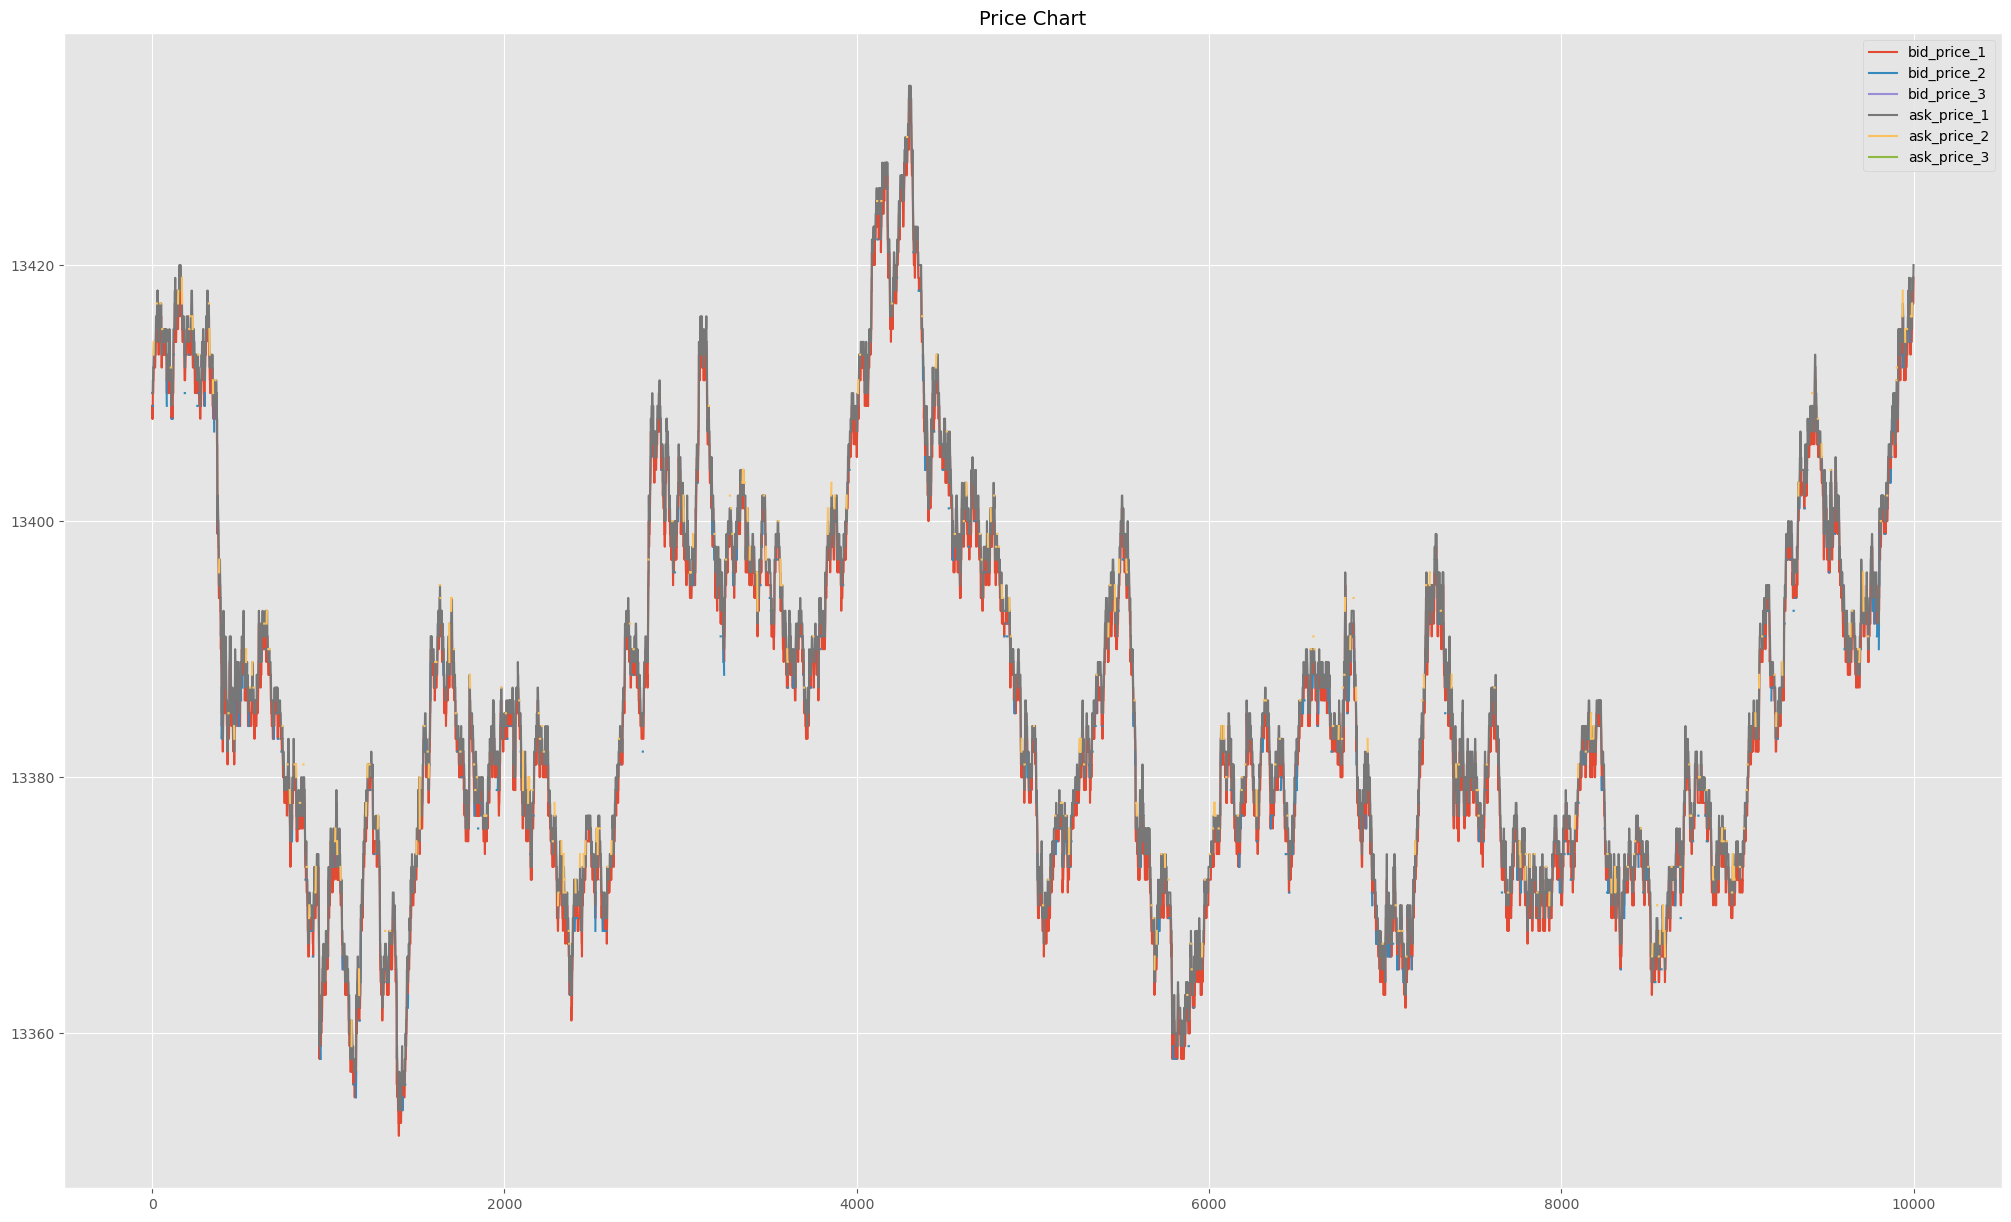

In [5]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

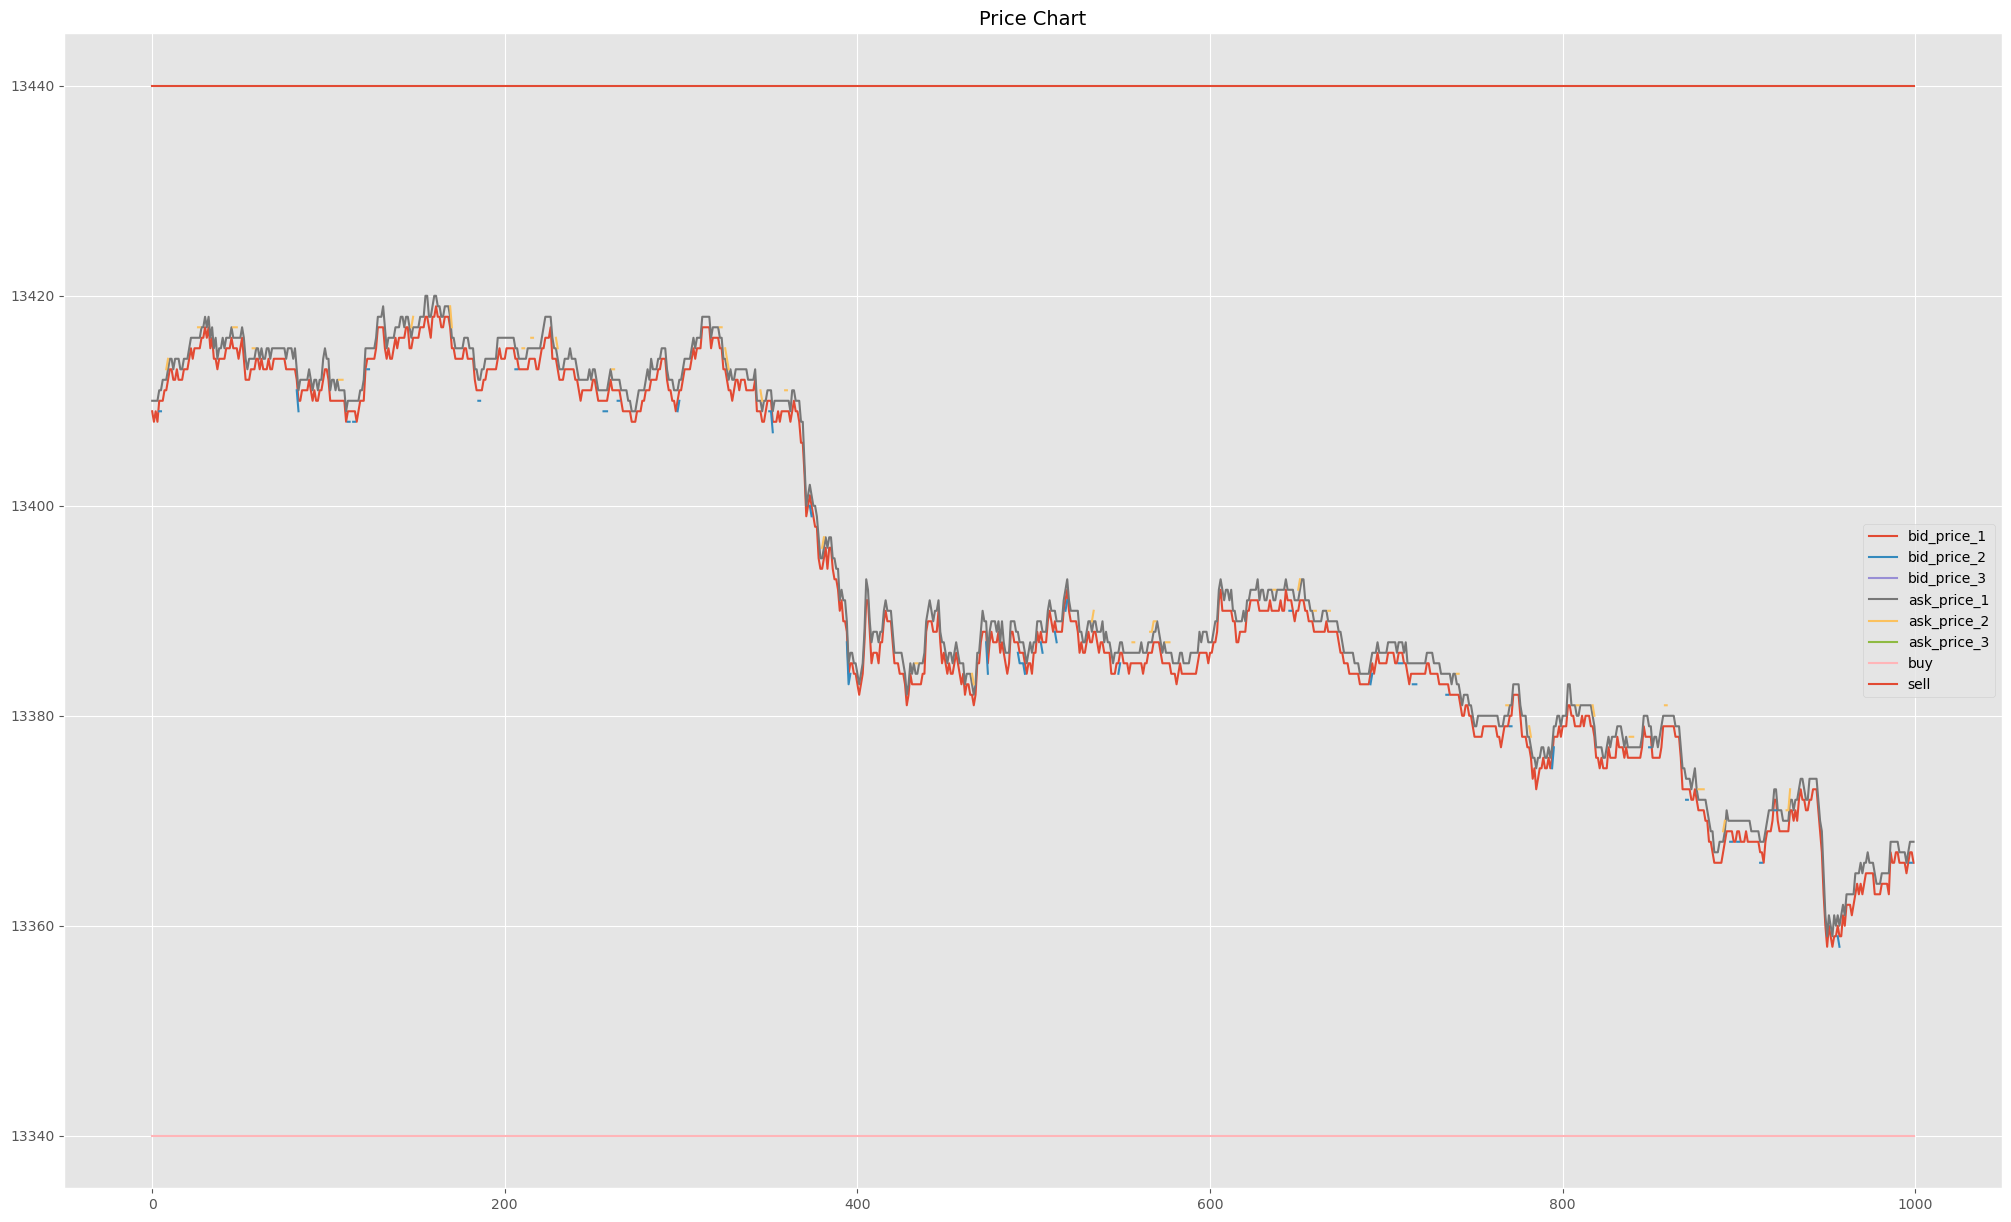

In [7]:
# slice
prices_sliced = prices[:1000]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 13440)
buy = np.full_like(ts, 13340)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    'buy': buy,
    'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

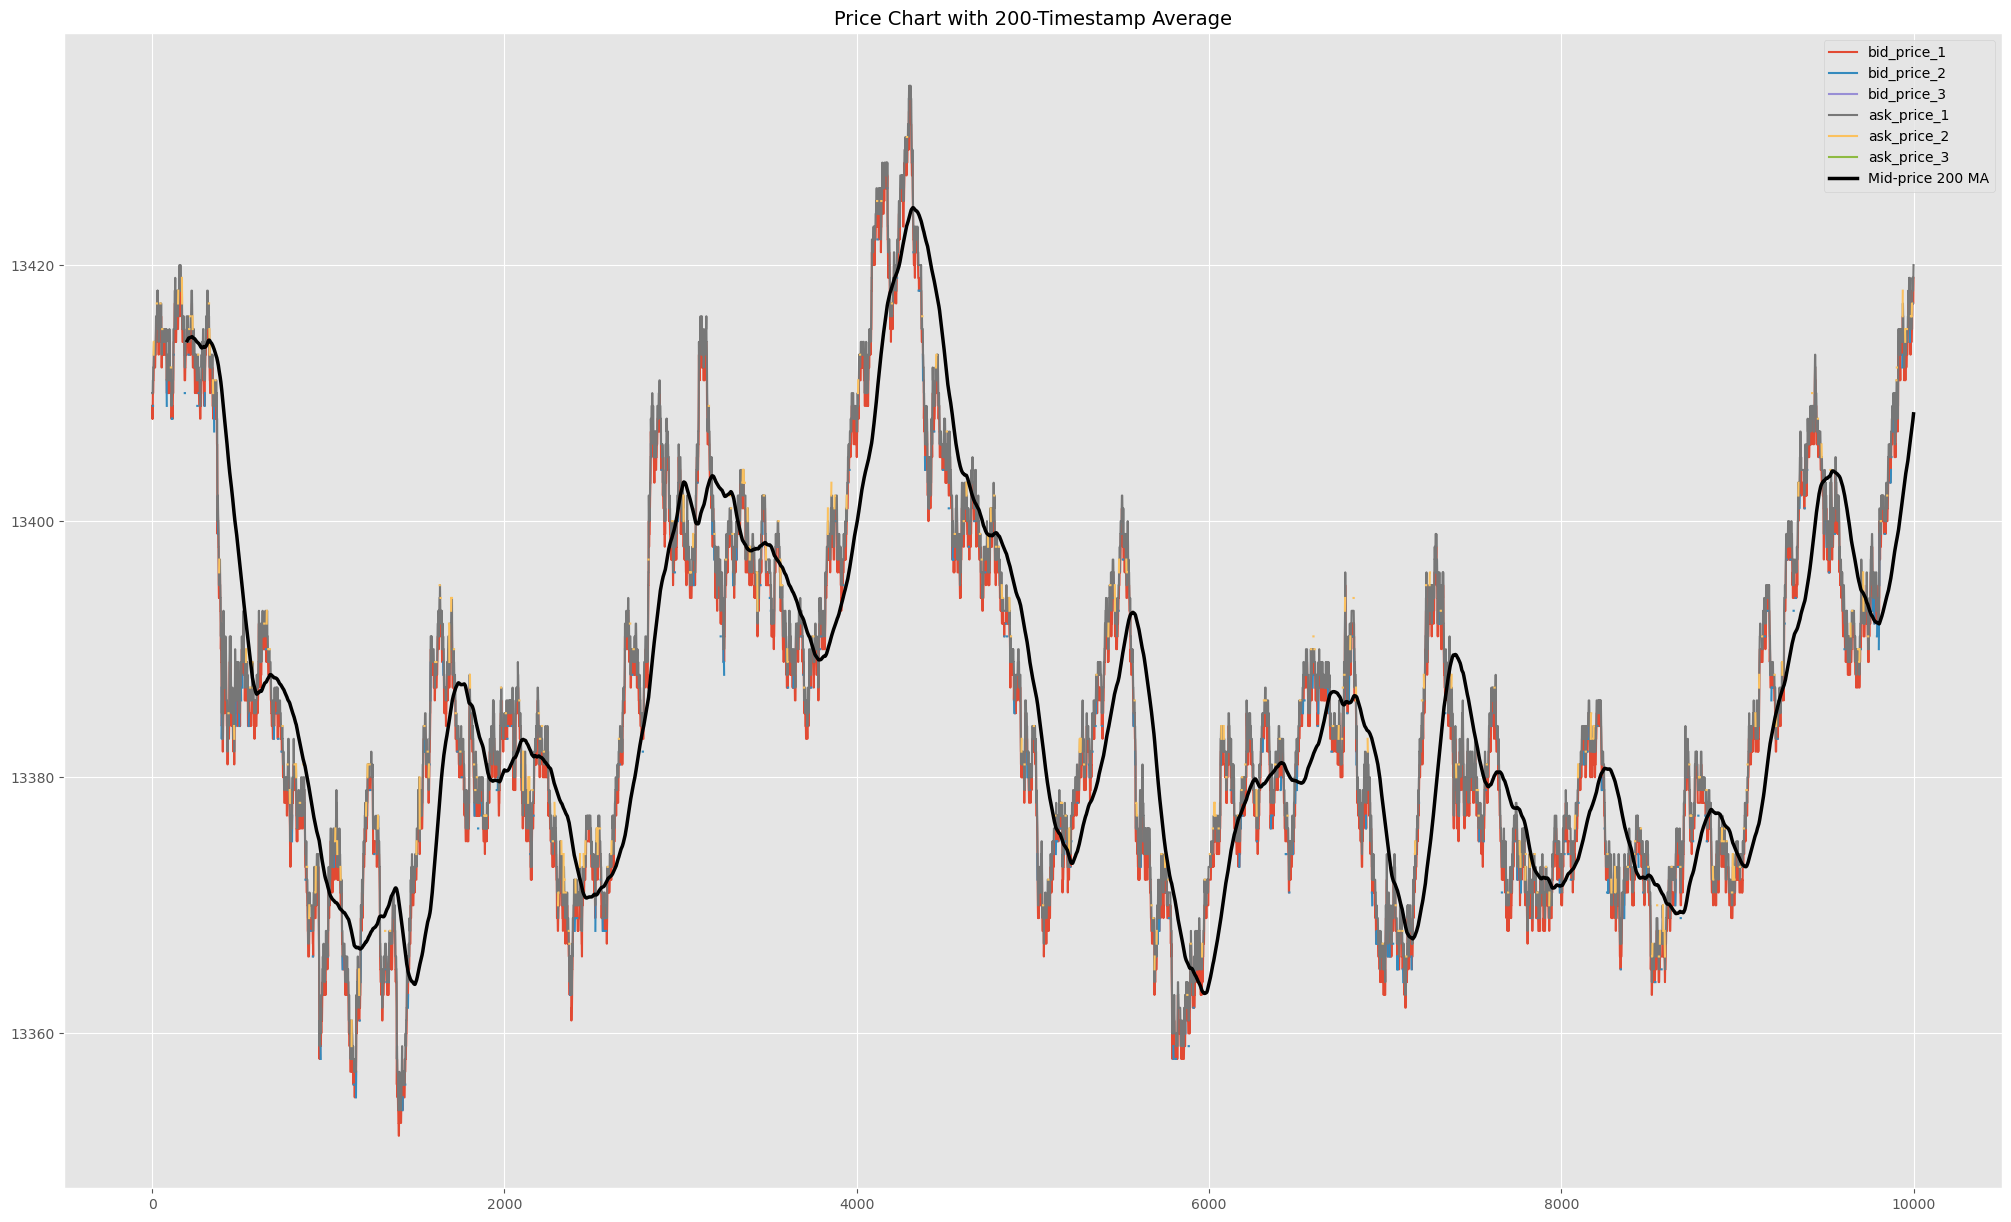

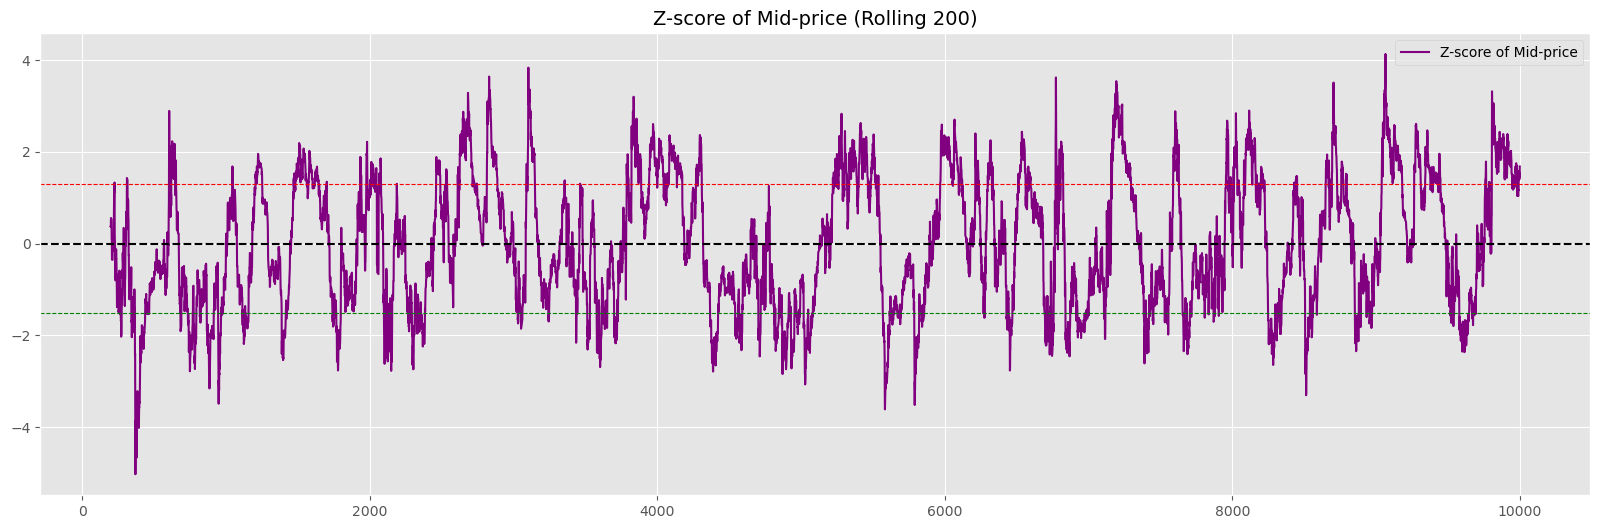

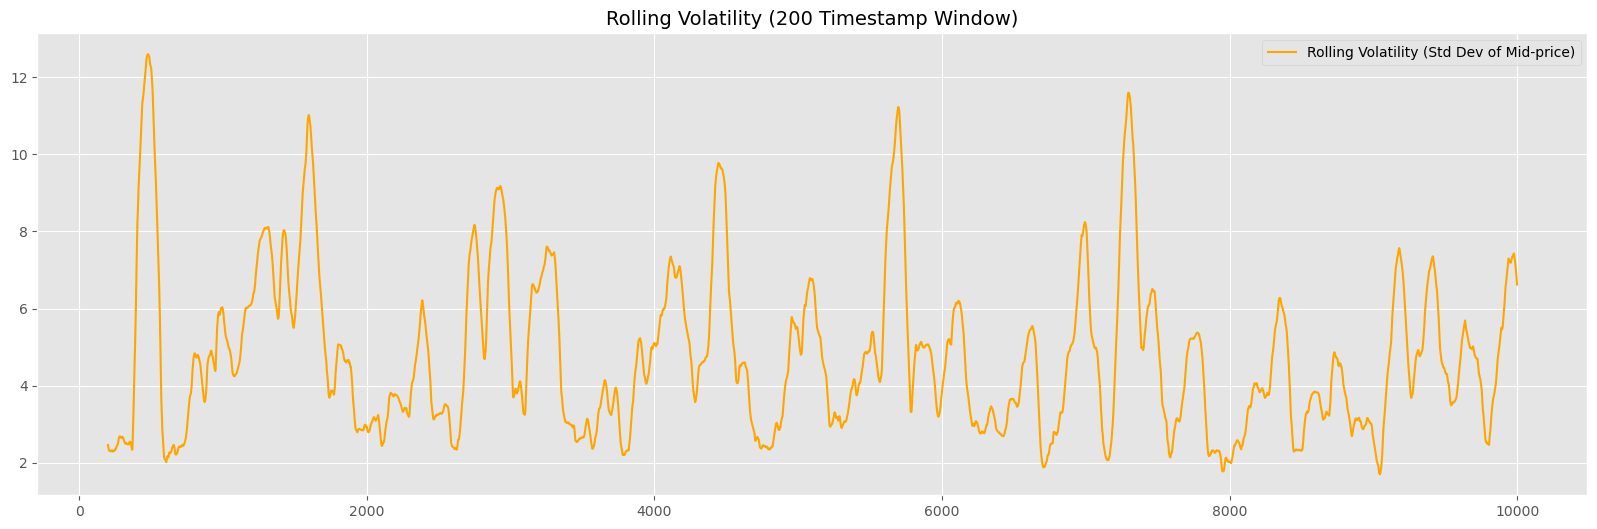

In [13]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

mid_price = (bp1 + ap1) / 2
rolling_avg_200 = mid_price.rolling(window=200).mean()
rolling_std_200 = mid_price.rolling(window=200).std()
z_score = (mid_price - rolling_avg_200) / rolling_std_200
volatility = rolling_std_200

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)

plt.plot(ts, rolling_avg_200, label='Mid-price 200 MA', color='black', linewidth=2.5)
plt.title('Price Chart with 200-Timestamp Average')
plt.legend()
plt.show()

# Plot Z-score
plt.figure(figsize=(20, 6))
plt.plot(ts, z_score, label='Z-score of Mid-price', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.3, color='red', linestyle='--', linewidth=0.8)
plt.axhline(-1.5, color='green', linestyle='--', linewidth=0.8)
plt.title('Z-score of Mid-price (Rolling 200)')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(20, 6))
plt.plot(ts, volatility, label='Rolling Volatility (Std Dev of Mid-price)', color='orange')
plt.title('Rolling Volatility (200 Timestamp Window)')
plt.legend()
plt.show()